In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
df = pd.read_csv("/content/diabetes (1).csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# df.Outcome.value_counts()
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [8]:
df.duplicated().sum()
# df.isnull().sum()
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
(df[df.columns] == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [10]:
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace({0:df[i].median()},inplace = True)

<ipython-input-10-b87fe7f13e44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({0:df[i].median()},inplace = True)


In [11]:
(df[df.columns] == 0).sum()

,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,227
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


Text(0.5, 1.0, 'correlation of feature')

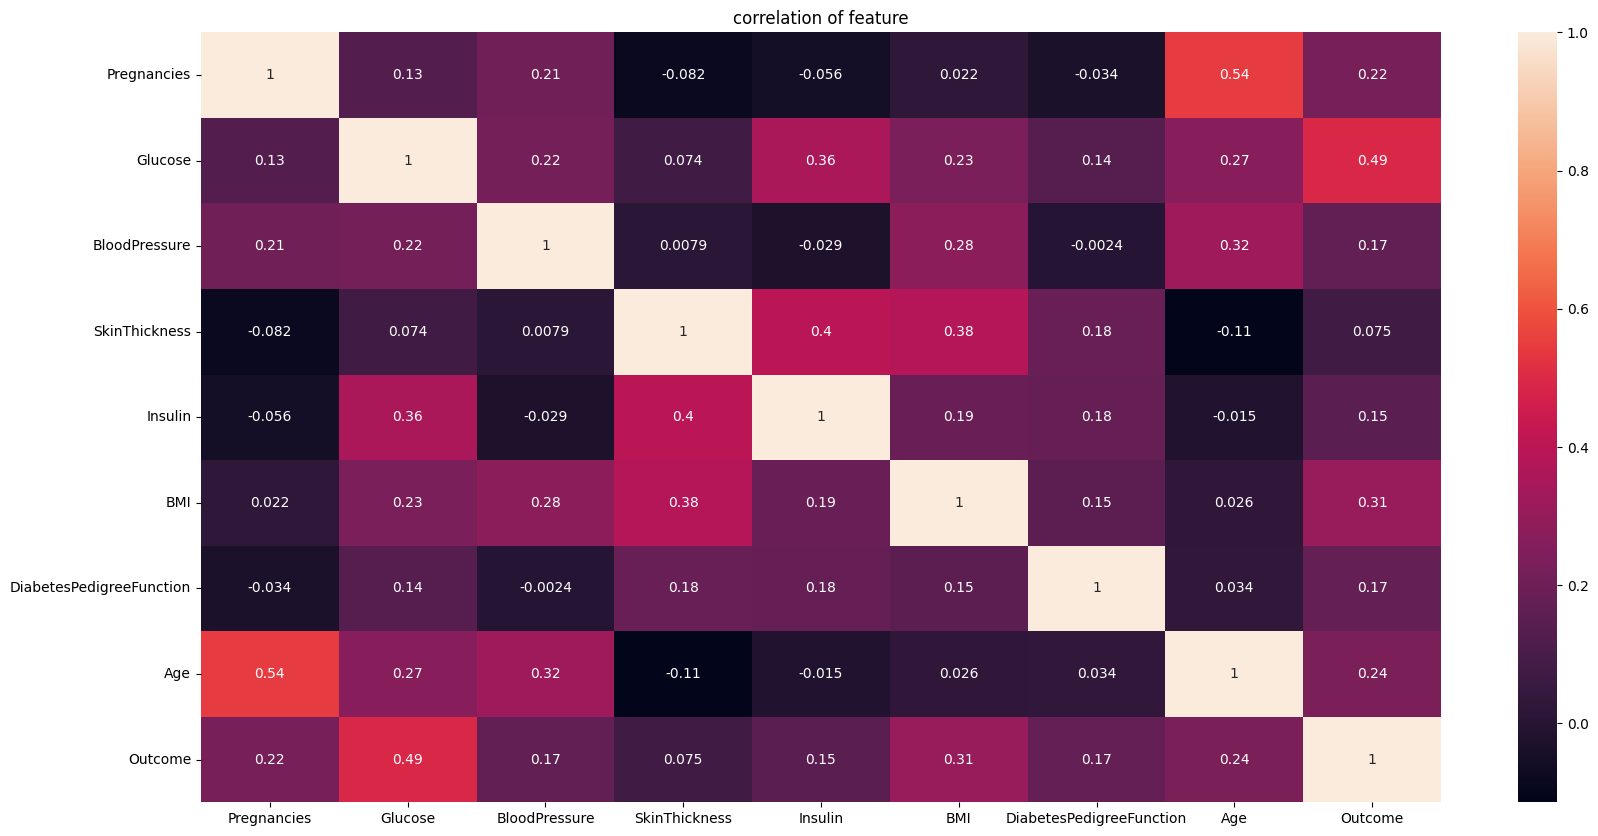

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

In [13]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']


In [14]:
cols = x.columns
index = x.index

In [15]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x = transformer.transform(x)
x = pd.DataFrame(x, columns = cols, index = index)

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,0.37500,-0.007752,0.175824,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.18750,-0.007752,-0.593407,-0.056209,0.117647
2,1.0,1.629630,-0.500,-0.71875,-0.007752,-0.956044,0.783007,0.176471
3,-0.4,-0.691358,-0.375,0.00000,0.648579,-0.428571,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,0.37500,1.413437,1.219780,5.007843,0.235294


In [17]:
from sklearn.model_selection import train_test_split


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=1337)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((752, 8), (16, 8), (752,), (16,))

In [20]:
# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
# Print metrics
print(f"Accuracy: {rf_accuracy:}")
print(f"Precision: {rf_precision:}")
print(f"Recall: {rf_recall:}")
print(f"F1 Score: {rf_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, rf_predictions))

Accuracy: 0.9375
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.50      1.00      0.67         1

    accuracy                           0.94        16
   macro avg       0.75      0.97      0.82        16
weighted avg       0.97      0.94      0.95        16



In [21]:
# XGBoost (xgb)
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
# Print metrics
print(f"Accuracy: {xgb_accuracy:}")
print(f"Precision: {xgb_precision:}")
print(f"Recall: {xgb_recall:}")
print(f"F1 Score: {xgb_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, xgb_predictions))

Accuracy: 0.8125
Precision: 0.25
Recall: 1.0
F1 Score: 0.4

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.25      1.00      0.40         1

    accuracy                           0.81        16
   macro avg       0.62      0.90      0.64        16
weighted avg       0.95      0.81      0.86        16



In [22]:
# KNearestNeighbour (knn)
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
# Print metrics
print(f"Accuracy: {knn_accuracy:}")
print(f"Precision: {knn_precision:}")
print(f"Recall: {knn_recall:}")
print(f"F1 Score: {knn_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, knn_predictions))

Accuracy: 0.875
Precision: 0.3333333333333333
Recall: 1.0
F1 Score: 0.5

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.33      1.00      0.50         1

    accuracy                           0.88        16
   macro avg       0.67      0.93      0.71        16
weighted avg       0.96      0.88      0.90        16



In [23]:
# StandardVectorMachine (svm)
svm_model = SVC(class_weight='balanced')
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
# Print metrics
print(f"Accuracy: {svm_accuracy:}")
print(f"Precision: {svm_precision:}")
print(f"Recall: {svm_recall:}")
print(f"F1 Score: {svm_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, svm_predictions))

Accuracy: 0.75
Precision: 0.2
Recall: 1.0
F1 Score: 0.3333333333333333

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.20      1.00      0.33         1

    accuracy                           0.75        16
   macro avg       0.60      0.87      0.59        16
weighted avg       0.95      0.75      0.81        16



In [24]:
# NaiveBayes (nb)
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)
# Print metrics
print(f"Accuracy: {nb_accuracy:}")
print(f"Precision: {nb_precision:}")
print(f"Recall: {nb_recall:}")
print(f"F1 Score: {nb_f1:}")

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, nb_predictions))

Accuracy: 0.9375
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.50      1.00      0.67         1

    accuracy                           0.94        16
   macro avg       0.75      0.97      0.82        16
weighted avg       0.97      0.94      0.95        16



In [25]:
import pickle
# Create instances of the top 3 models
nb_model = GaussianNB()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Create a VotingClassifier with the top 3 models
voting_classifier = VotingClassifier(
    estimators=[('rf', rf_model), ('nb', nb_model), ('knn', knn_model)],
    voting='hard'  # Use 'hard' voting to let each model vote for the final prediction
)

# Assuming you have your data and labels in X_train, X_test, y_train, y_test
# Fit the voting classifier to the training data
voting_classifier.fit(x_train, y_train)

# Evaluate the voting classifier on the test data
accuracy = voting_classifier.score(x_test, y_test)
print("Ensemble Voting Classifier Accuracy:", accuracy)
with open('voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

print("Voting Classifier saved successfully!")

Ensemble Voting Classifier Accuracy: 0.875
Voting Classifier saved successfully!


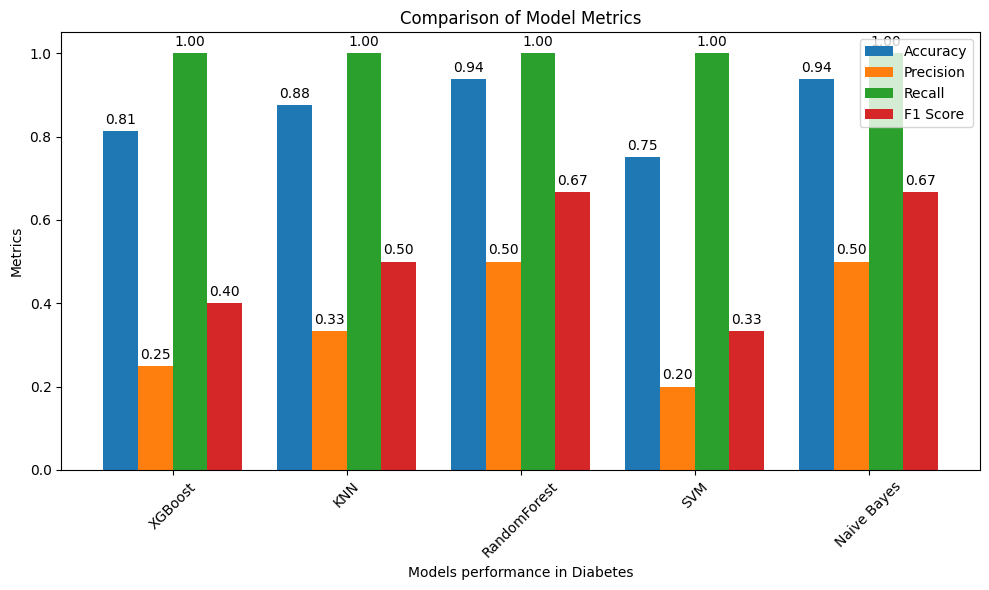

In [26]:
import matplotlib.pyplot as plt


# Initialize dictionary to store metrics
metrics = {
    "Model": ["XGBoost","KNN","RandomForest","SVM","Naive Bayes"],
    "Accuracy": [xgb_accuracy,knn_accuracy,rf_accuracy,svm_accuracy,nb_accuracy],
    "Precision": [xgb_precision,knn_precision,rf_precision,svm_precision,nb_precision],
    "Recall": [xgb_recall,knn_recall,rf_recall,svm_recall,nb_recall],
    "F1 Score": [xgb_f1,knn_f1,rf_f1,svm_f1,nb_f1]
}


# Convert metrics to NumPy array for plotting
x_labels = metrics["Model"]
accuracy = metrics["Accuracy"]
precision = metrics["Precision"]
recall = metrics["Recall"]
f1 = metrics["F1 Score"]

# Create bar graph
x = np.arange(len(x_labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')

# Add labels, title, and legend
ax.set_xlabel('Models performance in Diabetes')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend()

# Show values on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above bars
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()


In [28]:
import pickle
from sklearn.preprocessing import StandardScaler

# Step 2: Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(transformer, file)

# Step 3: Load the scaler from the file
with open('scaler.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)

# Step 4: Use the loaded scaler



In [32]:
import pickle
import numpy as np

# Step 1: Load the Saved Voting Classifier
with open('voting_classifier_Diabetes.pkl', 'rb') as file:
    voting_clf = pickle.load(file)

# Step 2: Define Input Data as a NumPy Array
# Example input: Replace these values with actual feature values
# Ensure the number of features matches the model's requirements
input_data = np.array([8,183,64,0,0,23.3,0.672,32]).reshape(1, -1)
# New data to scale

# Scale the data
scaled_data = loaded_scaler.transform(input_data)
print("Scaled Data:\n", scaled_data)

# Step 3: Make Predictions
try:
    # Predict the label
    predicted_label = voting_clf.predict(scaled_data)
    print(f"Predicted Label: {predicted_label[0]}")

    # Predict probabilities (if soft voting was used)
    if hasattr(voting_clf, "predict_proba"):
        predicted_probabilities = voting_clf.predict_proba(input_data)
        print(f"Predicted Probabilities: {predicted_probabilities}")
except Exception as e:
    print(f"Error during prediction: {e}")

# Optional: Handle Feature Preprocessing (if required)
# Uncomment and modify if your model requires scaling or encoding for input_data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# input_data = scaler.transform(input_data)  # Apply the same scaler used during training


Scaled Data:
 [[ 1.          1.62962963 -0.5        -0.71875    -0.32299742 -0.95604396
   0.78300654  0.17647059]]
Predicted Label: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
